# Image Captioning using Deep Learning

### CS5661 - Topics in Data Science
#### Group :- Hiralben Hirpara, Ruchita Savaliya
----------------------------------------------------------------------------------------------------------------


### Import important libraries

In [1]:
# tensorflow version
import tensorflow
print('tensorflow: %s' % tensorflow.__version__)
# keras version
import keras
print('keras: %s' % keras.__version__)

tensorflow: 2.4.1
keras: 2.4.3


In [1]:
import matplotlib.pyplot as plt

import pandas as pd 
import numpy as np
import os
from collections import Counter

from keras.preprocessing.image import load_img


print('All modules imported.')

All modules imported.


#### The location of the caption file and image file

In [2]:
## Set file paths
img_dir = 'IMGCG-DataSet/Flickr8k_Dataset/Images/'
caption_dir = 'IMGCG-DataSet/Flickr8k_text/'

In [3]:
images = os.listdir(img_dir)

print("The number of jpg image flies in Flicker8k: {}".format(len(images)))

The number of jpg image flies in Flicker8k: 8091


In [4]:
## Set caption file path 
token = caption_dir +'Flickr8k.token.txt'

## Read caption data from Flickr8k.token.txt file  and store it in img_captions
img_captions = open(token, 'r').read().strip().split('\n')

In [14]:
%%time

data_txt = []

for line in img_captions:
    column = line.split('\t')
    if len(column) == 1:
        continue
    w = column[0].split("#")
    data_txt.append(w + [column[1].lower()])

df_txt = pd.DataFrame(data_txt,columns=["img_filename","index","img_caption"])

# shows shape of dataframe
print(df_txt.shape,"\n")

(40460, 3) 

CPU times: user 56.8 ms, sys: 2.29 ms, total: 59.1 ms
Wall time: 58.1 ms


In [15]:
df_txt.head()

,img_filename,index,img_caption
0,1000268201_693b08cb0e.jpg,0,a child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,1,a girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,2,a little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,3,a little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,4,a little girl in a pink dress going into a woo...


In [7]:
df_txt.describe()

,img_filename,index,img_caption
count,40460,40460,40460
unique,8092,5,40175
top,2249480913_e1695e5c28.jpg,0,a dog runs through the grass .
freq,5,8092,7


In [16]:
df_txt.shape

(40460, 3)

In [9]:
uni_filenames = np.unique(df_txt.img_filename.values)
print("The number of unique file names : {}".format(len(uni_filenames)))
print("The distribution of the number of captions for each image:")
Counter(Counter(df_txt.img_filename.values).values())

The number of unique file names : 8092
The distribution of the number of captions for each image:


Counter({5: 8092})

In [27]:
feature = ["img_filename","index", "img_caption"]
df_new =  df_txt[feature]
df_new = df_txt[40:60]

In [34]:
image_path = uni_filenames[8:12]

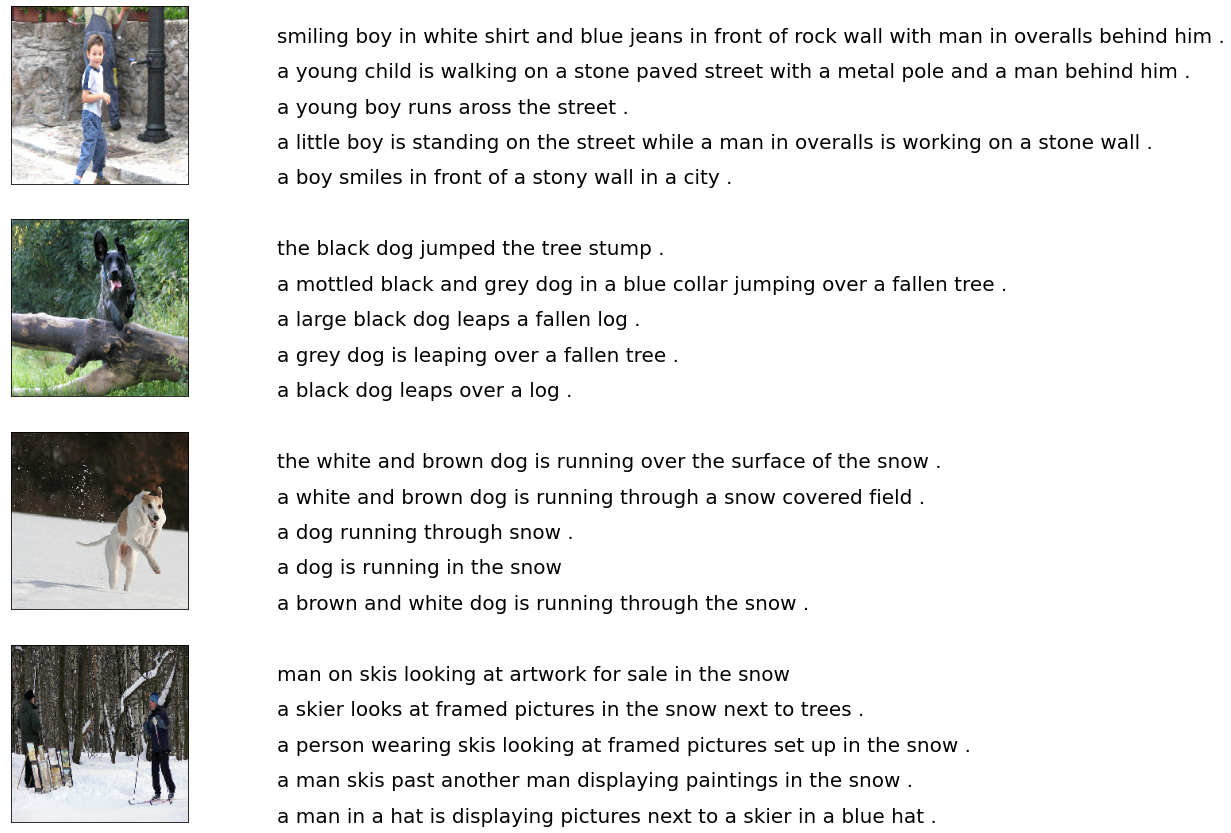

CPU times: user 998 ms, sys: 235 ms, total: 1.23 s
Wall time: 1.62 s


In [35]:
%%time

npic = 4
target_size = (224,224,3)

count = 1
fig = plt.figure(figsize=(10,15))
for img_name in image_path[:npic]:
    filename = img_dir + '/' + img_name
    captions = list(df_new["img_caption"].loc[df_new["img_filename"]==img_name].values)
    image_load = load_img(filename, target_size=target_size)
    
    ax = fig.add_subplot(pic,2,count,xticks=[],yticks=[])
    ax.imshow(image_load)
    count += 1
    
    ax = fig.add_subplot(npic,2,count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0,len(captions))
    for i, caption in enumerate(captions):
        ax.text(0,i,caption,fontsize=20)
    count += 1
plt.show()

In [76]:
%%time
def df_word_to_vocab(df_txt):
    vocabulary = []
    for i in range(len(df_txt)):
        temp=df_txt.iloc[i,2]
        vocabulary.extend(temp.split())
    print('Vocabulary Size: %d' % len(set(vocabulary)))
    ct = Counter(vocabulary)
    df_word = pd.DataFrame({"word":list(ct.keys()),"count":list(ct.values())})
    df_word = df_word.sort_values("count",ascending=False)
    df_word = df_word.reset_index()[["word","count"]]
    return(df_word)

df_word = df_word_to_vocab(df_txt)

Vocabulary Size: 8918
CPU times: user 852 ms, sys: 36.9 ms, total: 889 ms
Wall time: 1.92 s


In [77]:
df_word.head(5)

,word,count
0,a,62989
1,.,36581
2,in,18975
3,the,18419
4,on,10744


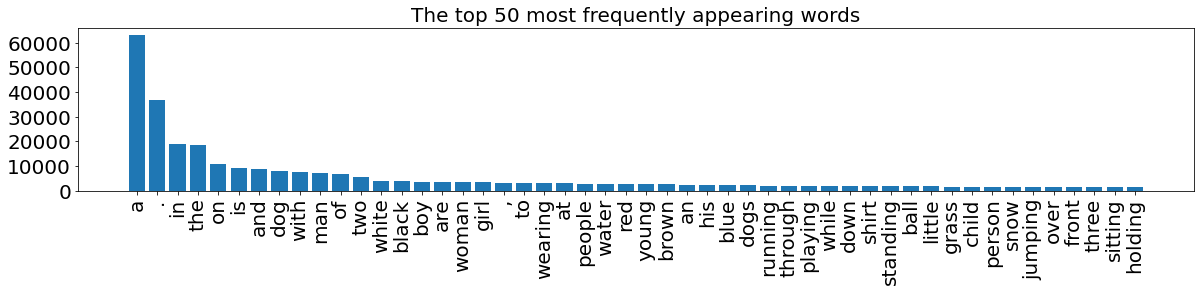

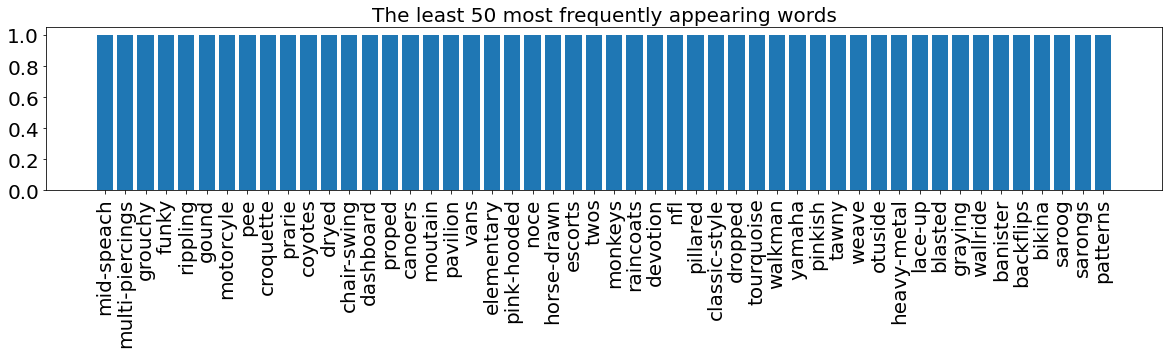

CPU times: user 1.48 s, sys: 169 ms, total: 1.65 s
Wall time: 3.41 s


In [80]:
%%time
topn = 50

def plthist(dfsub, title="The top 50 most frequently appearing words"):
    plt.figure(figsize=(20,3))
    plt.bar(dfsub.index,dfsub["count"])
    plt.yticks(fontsize=20)
    plt.xticks(dfsub.index,dfsub["word"],rotation=90,fontsize=20)
    plt.title(title,fontsize=20)
    plt.show()

plthist(dfword.iloc[:topn,:],
        title="The top 50 most frequently appearing words")
plthist(dfword.iloc[-topn:,:],
        title="The least 50 most frequently appearing words")